In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras import Model

Base_Model = VGG16(weights='imagenet', include_top=False, input_shape = (224, 224, 3))

for layer in Base_Model.layers:
  layer.trainable = False

Base_Model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
last_layer = Base_Model.get_layer('block4_pool')
print('last layer output shape: ', last_layer.output_shape)

last layer output shape:  (None, 14, 14, 512)


In [ ]:
last_output = last_layer.output
x = layers.Flatten()(last_output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers. Dense (4, activation='softmax')(x)

model = Model(Base_Model.input, x)
model.compile(optimizer = SGD(lr=0.0001), loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
TRAINING_DIR = '/content/drive/MyDrive/Four Disaster/Training'
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=64,
    class_mode='categorical',
    target_size=(224, 224)
)

VALIDATION_DIR = '/content/drive/MyDrive/Four Disaster/Testing'
validation_datagen = ImageDataGenerator(rescale= 1./255.)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=64,
    class_mode='categorical',
    target_size=(224, 224)
)


Found 3544 images belonging to 4 classes.
Found 891 images belonging to 4 classes.


In [ ]:
history = model.fit_generator(train_generator,
                              epochs=75,
                              verbose=1,
                              validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/75
56/56 [==============================] - 1509s 26s/step - loss: 2.0549 - accuracy: 0.4039 - val_loss: 0.9999 - val_accuracy: 0.6397
Epoch 2/75
56/56 [==============================] - 138s 2s/step - loss: 1.2351 - accuracy: 0.6131 - val_loss: 0.8445 - val_accuracy: 0.7015
Epoch 3/75
56/56 [==============================] - 137s 2s/step - loss: 0.9419 - accuracy: 0.6819 - val_loss: 0.7961 - val_accuracy: 0.7295
Epoch 4/75
56/56 [==============================] - 137s 2s/step - loss: 0.8390 - accuracy: 0.7088 - val_loss: 0.7308 - val_accuracy: 0.7587
Epoch 5/75
56/56 [==============================] - 136s 2s/step - loss: 0.7156 - accuracy: 0.7380 - val_loss: 0.6585 - val_accuracy: 0.7710
Epoch 6/75
56/56 [==============================] - 137s 2s/step - loss: 0.6771 - accuracy: 0.7586 - val_loss: 0.6422 - val_accuracy: 0.7666
Epoch 7/75
56/56 [==============================] - 141s 3s/step - loss: 0.6163 - accuracy: 0.7704 - val_loss: 0.6369 - val_accuracy: 0.7800
Epoch 8/75


Text(0.5, 1.0, 'Training and validation loss')

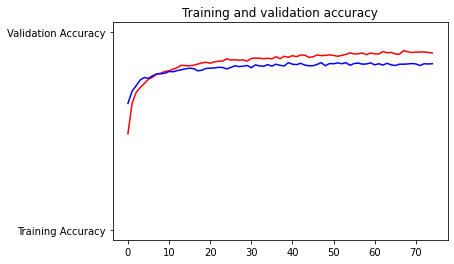

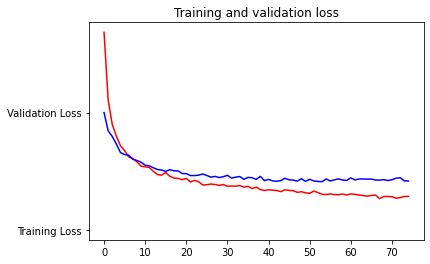

In [ ]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [ ]:
import numpy as np
from keras.preprocessing import image

img_width, img_height = 224, 224
img = image.load_img('/content/drive/MyDrive/Nyoba/Earthquake.jpg', target_size = (img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

model.predict(img)

array([[0., 1., 0., 0.]], dtype=float32)

In [ ]:
tf.keras.models.save_model(
  model, 'Disaster_Prediction'
)

INFO:tensorflow:Assets written to: Disaster_Prediction/assets


In [ ]:
model.save('my_model.h5')
